In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­ minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

First let's resample the data into 15 min intervals, then we'll count the logins and plot the data, showing daily and weekly averages.

In [10]:
df_logins = pd.read_json('logins.json')
print(df_logins.info())
df_logins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [11]:
df_logins.set_index('login_time', inplace=True)
df_logins['login_counts'] = np.ones(len(df_logins))
df_logins.head()

,login_counts
login_time,
1970-01-01 20:13:18,1.0
1970-01-01 20:16:10,1.0
1970-01-01 20:16:37,1.0
1970-01-01 20:16:36,1.0
1970-01-01 20:26:21,1.0


In [12]:
df_logins_15min = df_logins.resample('15T').sum()
df_logins_15min.head()

,login_counts
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [13]:
df_logins_15min['time'] = df_logins_15min.reset_index()['login_time'].dt.time.tolist()
df_logins_15min['day_of_week'] = df_logins_15min.reset_index()['login_time'].dt.dayofweek.tolist()
df_logins_15min['month'] = df_logins_15min.reset_index()['login_time'].dt.month.tolist()
df_logins_15min.reset_index(drop=True, inplace=True)
df_logins_15min.head()

,login_counts,time,day_of_week,month
0,2.0,20:00:00,3,1
1,6.0,20:15:00,3,1
2,9.0,20:30:00,3,1
3,7.0,20:45:00,3,1
4,1.0,21:00:00,3,1


Let's first take a look at the daily average number of logins by time of day across all days of the week.

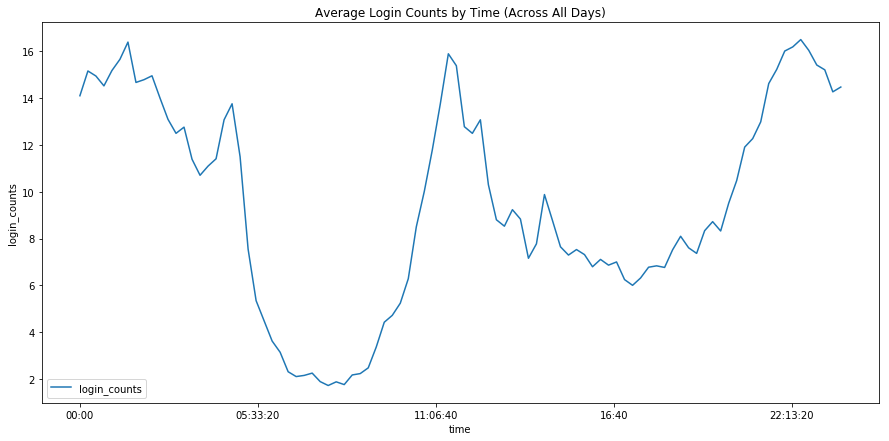

In [103]:
fig, ax = plt.subplots(figsize=(15,7))
df_logins_15min.groupby(['time']).mean().reset_index().plot(x='time', y='login_counts', ax=ax)
ax.set_ylabel('login_counts')
ax.set_title('Average Login Counts by Time (Across All Days)')
plt.show()

Looks like their are generally two peaks for each day, one during the late night/early morning and the other around mid-day. Now let's see how this varies from day to day throughout the week

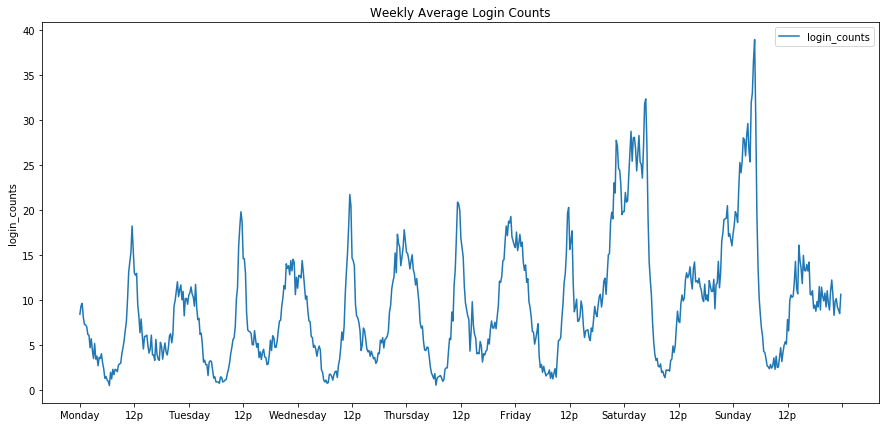

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
df_logins_15min.groupby(['day_of_week', 'time']).mean().reset_index().plot( y='login_counts', ax=ax)
ax.set_xticks(range(0, 673, int(672/14)))
ax.set_xticklabels(['Monday', '12p', 'Tuesday', '12p', 'Wednesday', '12p', 'Thursday', '12p', 'Friday', '12p', 'Saturday', '12p', 'Sunday', '12p'])
ax.set_ylabel('login_counts')
ax.set_title('Average Login Counts Over Every Day of the Week')
plt.show()

Looks like overall there is a steady increase in total number of daily logins starting from Monday until the end of the week. Let's take a closer look at each day.

In [120]:
# resample by day to count total daily average number of logins
df_logins_day = df_logins.resample('D').sum()
df_logins_day['day_of_week'] = df_logins.resample('D').sum().reset_index()['login_time'].dt.dayofweek.tolist()
df_logins_day.head()

,login_counts,day_of_week
login_time,,
1970-01-01,112.0,3
1970-01-02,681.0,4
1970-01-03,793.0,5
1970-01-04,788.0,6
1970-01-05,459.0,0


In [194]:
def plot_days(day):
    '''make a plot of the number of logins vs day, where day is a number 0-6 starting with monday and annotate 
        the plot with the total daily average for that day'''
    fig, ax = plt.subplots(figsize=(16,8))
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df = df_logins_15min.groupby(['day_of_week', 'time']).sum().loc[day].reset_index()
    df.plot(x='time', y='login_counts', legend=False, ax=ax)
    
    daily_avg = int(df_logins_day.groupby(['day_of_week']).sum().loc[i]
                    / df_logins_day.day_of_week.value_counts()[i])
    y=df.login_counts.min()
    ax.annotate('{} average total logins: {}'.format(days[i], daily_avg), xy=(0, 50), xytext=(60000, y), size=14)
    ax.set_title(days[day])
    ax.set_ylabel('login_count')

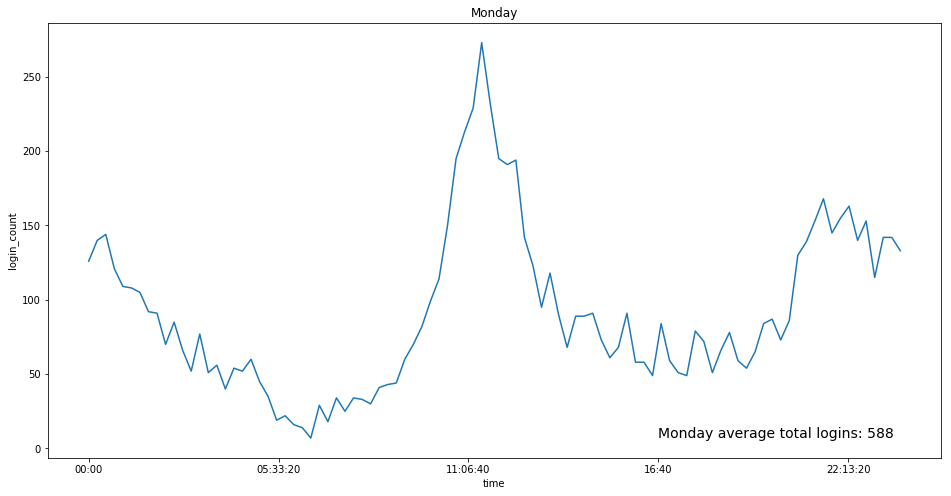

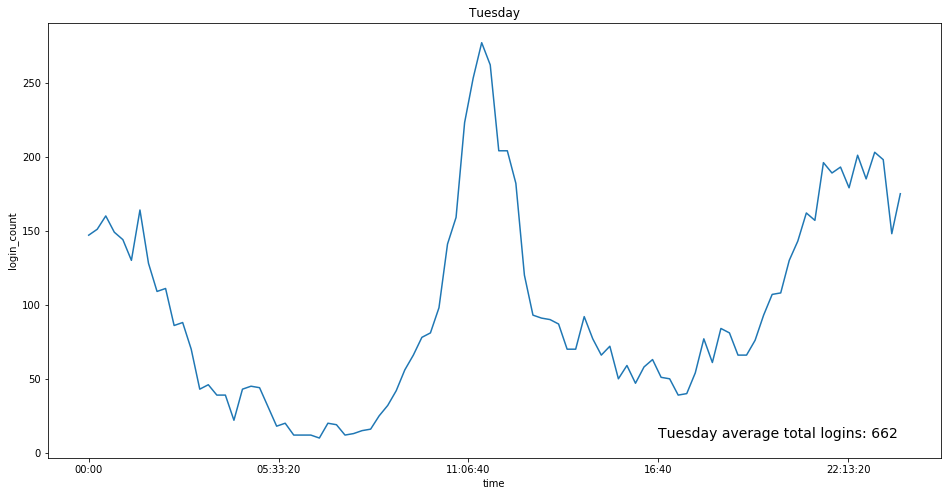

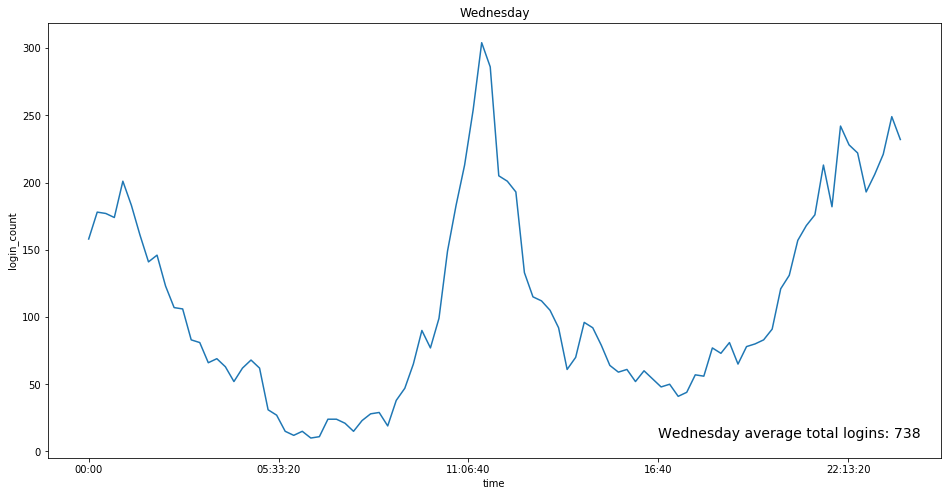

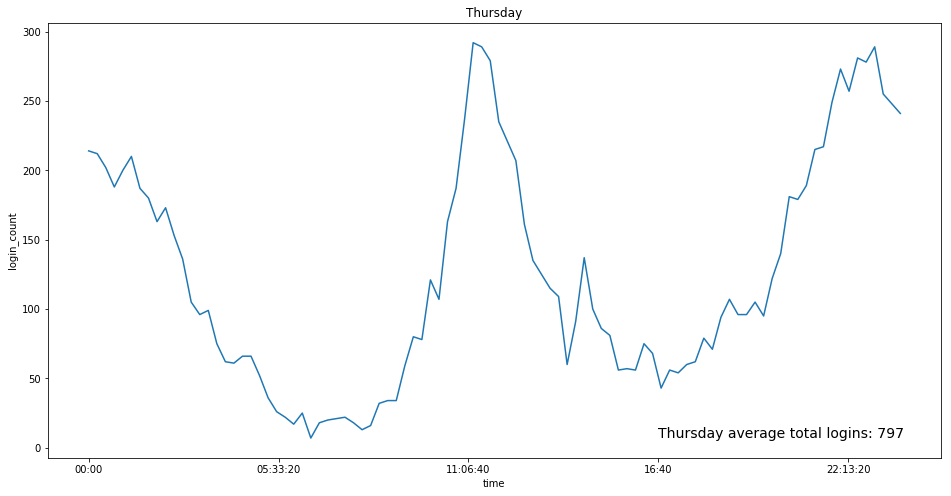

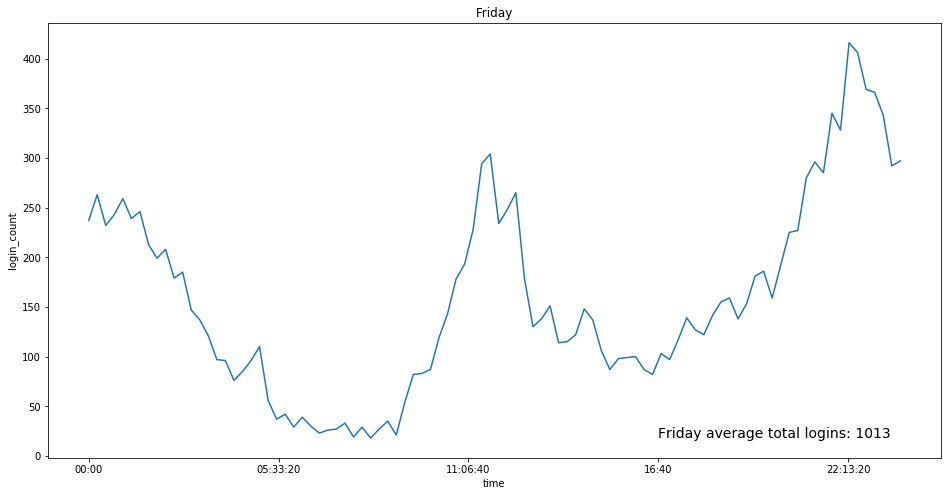

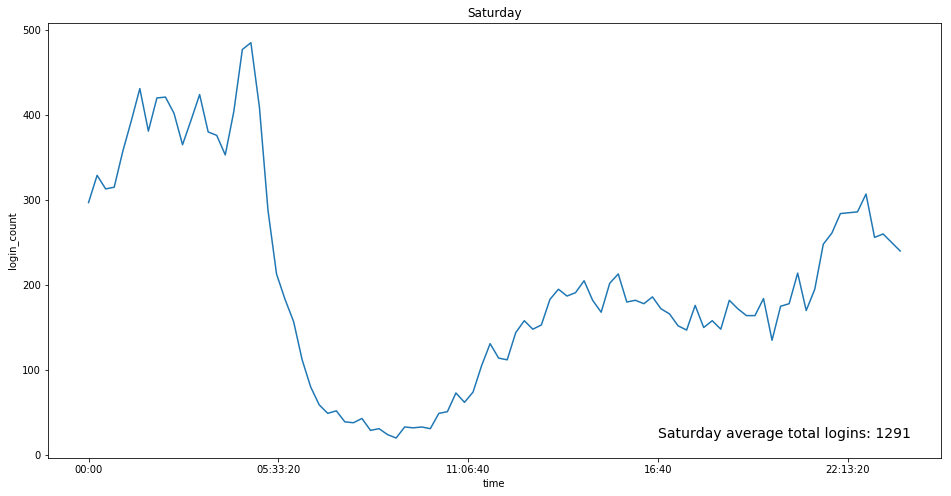

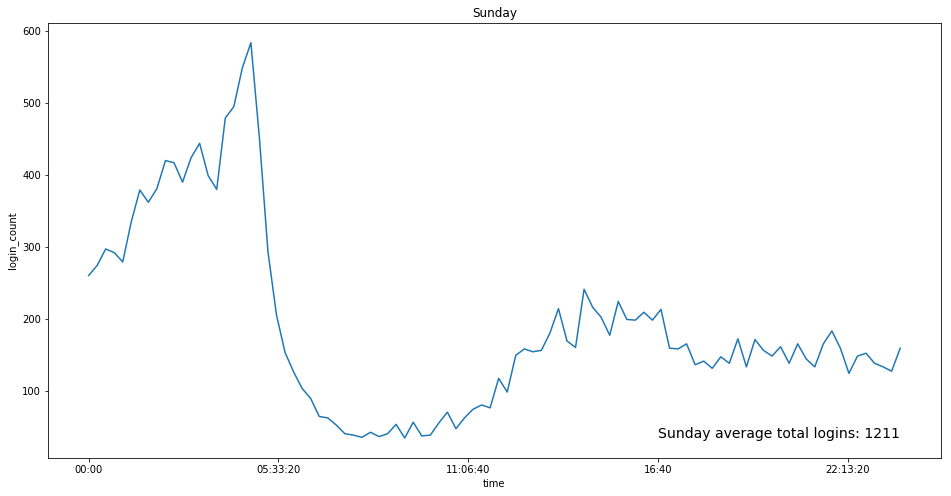

In [195]:
for i in range(7):
    plot_days(i)

Looks like the trend for number of logins vs time of day is pretty consistent Monday through Friday with peak traffic late night/early morning and mid-day, but changes on the weekends to peak in the early morning and steady throughout the afternoon. There doesn't seem to be any issues with the quality of the data.